# Preliminary EDA

In [1]:
# Suppress native-hadoop warning
!sed -i '$a\# Add the line for suppressing the NativeCodeLoader warning \nlog4j.logger.org.apache.hadoop.util.NativeCodeLoader=ERROR,console' /$HADOOP_HOME/etc/hadoop/log4j.properties

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conf = pyspark.SparkConf().setAll([
    ('spark.master', 'local[*]'),
    ('spark.app.name', 'App Name')
])
spark = SparkSession.builder.config(conf=conf).getOrCreate()


#### EDA on songs with ratings train data file

In [3]:
song_ratings = spark.read.text("file:///home/work/Project/yahoo_dataset/train_0.txt").cache()
song_ratings = song_ratings.limit(1000000)
song_ratings.printSchema()
print(song_ratings.count())

root
 |-- value: string (nullable = true)



1000000


In [4]:
song_ratings.show(5)

+----------+
|     value|
+----------+
| 0\t166\t5|
|0\t2245\t4|
|0\t3637\t4|
|0\t5580\t4|
|0\t5859\t4|
+----------+
only showing top 5 rows



In [5]:
song_ratings = song_ratings.withColumn("user_id", split(song_ratings.value, "\t")[0]) \
       .withColumn("song_id", split(song_ratings.value, "\t")[1]) \
       .withColumn("ratings", split(song_ratings.value, "\t")[2]) \
       .drop("value")

In [6]:
song_ratings.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- song_id: string (nullable = true)
 |-- ratings: string (nullable = true)



In [7]:
song_ratings = song_ratings.withColumn("user_id", col("user_id").cast("integer")) \
       .withColumn("song_id", col("song_id").cast("integer")) \
       .withColumn("ratings", col("ratings").cast("integer"))
song_ratings.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- song_id: integer (nullable = true)
 |-- ratings: integer (nullable = true)



In [8]:
song_ratings.show(5)

+-------+-------+-------+
|user_id|song_id|ratings|
+-------+-------+-------+
|      0|    166|      5|
|      0|   2245|      4|
|      0|   3637|      4|
|      0|   5580|      4|
|      0|   5859|      4|
+-------+-------+-------+
only showing top 5 rows



#### EDA on song attribute file

In [9]:
song_attributes = spark.read.text("file:///home/work/Project/yahoo_dataset/song-attributes.txt").cache()
song_attributes.printSchema()
print(song_attributes.count())

root
 |-- value: string (nullable = true)

136736


In [10]:
song_attributes.show(5)

+-------------------+
|              value|
+-------------------+
|  0\t12070\t8490\t0|
|1\t19512\t7975\t134|
|  2\t18953\t3492\t0|
|    3\t695\t2653\t0|
|    4\t243\t2282\t0|
+-------------------+
only showing top 5 rows



In [11]:
song_attributes = song_attributes.withColumn("song_id", split(song_attributes.value, "\t")[0]) \
       .withColumn("album_id", split(song_attributes.value, "\t")[1]) \
       .withColumn("artist_id", split(song_attributes.value, "\t")[2]) \
       .withColumn("genre_id", split(song_attributes.value, "\t")[3]) \
       .drop("value")

In [12]:
song_attributes.printSchema()

root
 |-- song_id: string (nullable = true)
 |-- album_id: string (nullable = true)
 |-- artist_id: string (nullable = true)
 |-- genre_id: string (nullable = true)



In [13]:
song_attributes = song_attributes.withColumn("song_id", col("song_id").cast("integer")) \
       .withColumn("album_id", col("album_id").cast("integer")) \
       .withColumn("artist_id", col("artist_id").cast("integer"))
song_attributes.printSchema()

root
 |-- song_id: integer (nullable = true)
 |-- album_id: integer (nullable = true)
 |-- artist_id: integer (nullable = true)
 |-- genre_id: string (nullable = true)



In [14]:
song_attributes.show(5)

+-------+--------+---------+--------+
|song_id|album_id|artist_id|genre_id|
+-------+--------+---------+--------+
|      0|   12070|     8490|       0|
|      1|   19512|     7975|     134|
|      2|   18953|     3492|       0|
|      3|     695|     2653|       0|
|      4|     243|     2282|       0|
+-------+--------+---------+--------+
only showing top 5 rows



#### EDA on genre hierarchy file

In [15]:
genre_hierarchy = spark.read.text("file:///home/work/Project/yahoo_dataset/genre-hierarchy.txt").cache()
genre_hierarchy.printSchema()

root
 |-- value: string (nullable = true)



In [16]:
genre_hierarchy.show(5)

+--------------------+
|               value|
+--------------------+
|    0\t0\t1\tUnknown|
|1\t1\t1\tElectron...|
|    2\t1\t2\tAmbient|
|3\t2\t3\tAmbient Dub|
|4\t2\t3\tAmbient ...|
+--------------------+
only showing top 5 rows



In [17]:
genre_hierarchy = genre_hierarchy.withColumn("genre_id", split(genre_hierarchy.value, "\t")[0]) \
       .withColumn("parent_genre_id", split(genre_hierarchy.value, "\t")[1]) \
       .withColumn("level", split(genre_hierarchy.value, "\t")[2]) \
       .withColumn("genre_name", split(genre_hierarchy.value, "\t")[3]) \
       .drop("value")

In [18]:
genre_hierarchy.printSchema()
print(genre_hierarchy.count())

root
 |-- genre_id: string (nullable = true)
 |-- parent_genre_id: string (nullable = true)
 |-- level: string (nullable = true)
 |-- genre_name: string (nullable = true)

216


In [19]:
genre_hierarchy = genre_hierarchy.withColumn("genre_id", col("genre_id").cast("integer")) \
       .withColumn("parent_genre_id", col("parent_genre_id").cast("integer")) \
       .withColumn("level", col("level").cast("integer"))
genre_hierarchy.printSchema()

root
 |-- genre_id: integer (nullable = true)
 |-- parent_genre_id: integer (nullable = true)
 |-- level: integer (nullable = true)
 |-- genre_name: string (nullable = true)



In [20]:
genre_hierarchy.show(5)

+--------+---------------+-----+----------------+
|genre_id|parent_genre_id|level|      genre_name|
+--------+---------------+-----+----------------+
|       0|              0|    1|         Unknown|
|       1|              1|    1|Electronic/Dance|
|       2|              1|    2|         Ambient|
|       3|              2|    3|     Ambient Dub|
|       4|              2|    3|    Ambient Tech|
+--------+---------------+-----+----------------+
only showing top 5 rows



#### Joining all files together based on song_id and genre_id

In [21]:
df = song_ratings.join(song_attributes, "song_id", how="inner")
df = df.join(genre_hierarchy,"genre_id", how="inner")

In [22]:
df = df.drop('parent_genre_id').drop('level')
df.describe().show()

+-------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+
|summary|         genre_id|          song_id|          user_id|          ratings|         album_id|         artist_id|       genre_name|
+-------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+
|  count|          1000000|          1000000|          1000000|          1000000|          1000000|           1000000|          1000000|
|   mean|        16.756151|     68299.584969|      1322.364986|         3.184917|     10344.492844|       4776.511339|             NULL|
| stddev|43.16625508416077|39474.06865195663|789.1489184439173|1.579644010018165|5917.110782128683|2687.8513016557085|             NULL|
|    min|                0|                0|                0|                1|                0|                 0|Adult Alternative|
|    max|               88|           136

In [23]:
null_columns = {column: df.filter(col(column).isNull()).count() for column in df.columns}
null_columns

{'genre_id': 0,
 'song_id': 0,
 'user_id': 0,
 'ratings': 0,
 'album_id': 0,
 'artist_id': 0,
 'genre_name': 0}

In [24]:
df.show(10)

+--------+-------+-------+-------+--------+---------+------------+
|genre_id|song_id|user_id|ratings|album_id|artist_id|  genre_name|
+--------+-------+-------+-------+--------+---------+------------+
|       0|    166|      0|      5|    5303|     7231|     Unknown|
|       0|   2245|      0|      4|   14290|     3265|     Unknown|
|       0|   3637|      0|      4|   15761|      629|     Unknown|
|       0|   5580|      0|      4|    8324|     4761|     Unknown|
|       0|   5859|      0|      4|   19671|     4716|     Unknown|
|       0|   7121|      0|      3|    5303|     7372|     Unknown|
|       0|  10405|      0|      4|    5303|     7149|     Unknown|
|       0|  16794|      0|      5|    2517|     7620|     Unknown|
|     135|  17821|      0|      5|    8620|     2020|Classic Rock|
|       0|  21252|      0|      4|   15761|     2535|     Unknown|
+--------+-------+-------+-------+--------+---------+------------+
only showing top 10 rows



In [25]:
df.groupBy('genre_name').count().show()
print(df.groupBy('genre_name').count().count())

+------------------+------+
|        genre_name| count|
+------------------+------+
|           Unknown|858819|
|      Classic Rock|  4508|
|              Rock| 68604|
|               Pop| 22968|
|           Country|  7042|
|               R&B| 16819|
|Adult Contemporary|  1218|
|    Easy Listening|   589|
|Shows &amp; Movies|   300|
|               Rap|  4526|
|       Classic R&B|   862|
|    Mainstream Pop|    39|
|             World|   137|
|        Vocal Jazz|   209|
|            Reggae|  1257|
|       Modern Rock|   401|
|        R&B Gospel|   129|
|              Folk|   959|
|         Christmas|   435|
| Adult Alternative|   861|
+------------------+------+
only showing top 20 rows



58


In [26]:



# users and number amnt ratings comparison x
# ratings count by genre -  rating distribution x
# average ratings genre box x
# ratings avg by artist top 10... box
# ratings avg by song top 10. box
# ratings count by artist top 10...
# ratings cnt by song top 10.
# songs in genre breakdown
# songs in album breakdown?


#correlation heatmap - could show popular suggestions comparison? 
#network graph artists, albums, and songs....

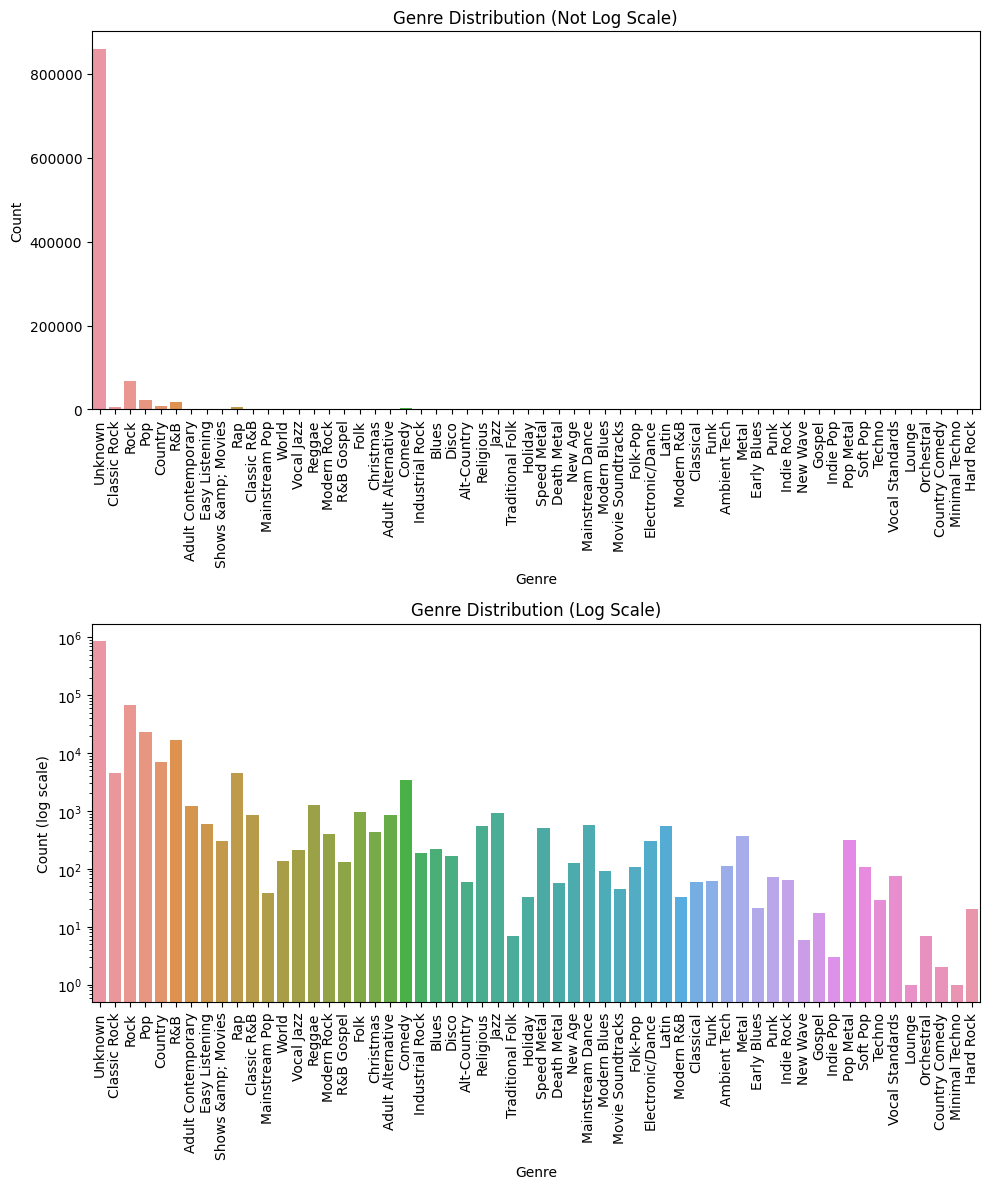

In [27]:
# genre count dist

genre_pdf = df.select('genre_name').toPandas()
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# no log
sns.countplot(data=genre_pdf, x='genre_name', ax=axes[0])
axes[0].set_title('Genre Distribution (Not Log Scale)')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# log
sns.countplot(data=genre_pdf, x='genre_name', ax=axes[1])
axes[1].set_title('Genre Distribution (Log Scale)')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Count (log scale)')
axes[1].set_yscale('log')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [28]:
# users and number amnt ratings comparison

# number of users with x number of ratings
# might be too big to grpah with size 845

num_user_rating = df.groupBy('user_id').count()
print(num_user_rating.count())
# number of ratings and its number of users
num_rating_users = num_user_rating.groupBy('count').count()
print(num_rating_users.count())
num_rating_users.show()
#num ratings vs num users with rating count

2677


845


+-----+-----+
|count|count|
+-----+-----+
|   34|   14|
|  387|    1|
|  358|    1|
|  122|    8|
|   70|   12|
|   21|   33|
| 1349|    2|
|  125|    6|
|  539|    2|
|  181|    4|
|  580|    1|
|  705|    2|
|  164|    4|
|   25|   14|
|  256|    5|
|   54|   15|
|  103|    7|
|   64|   14|
|  394|    4|
| 1365|    1|
+-----+-----+
only showing top 20 rows



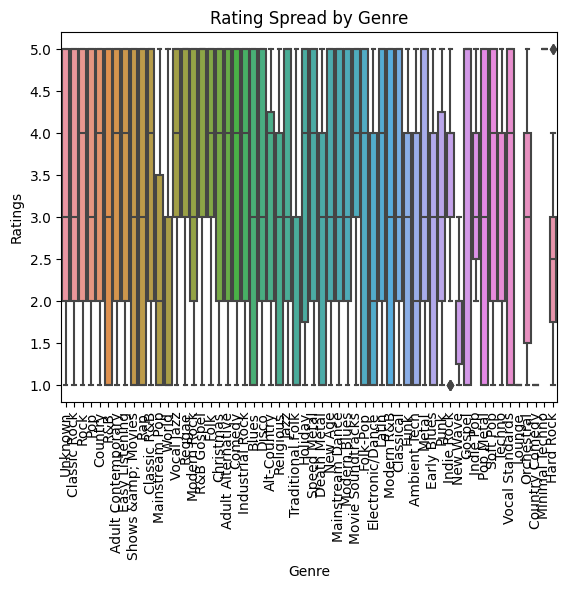

In [29]:
pdf = df.toPandas()
sns.boxplot(data=pdf, x='genre_name', y='ratings')
plt.title('Rating Spread by Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

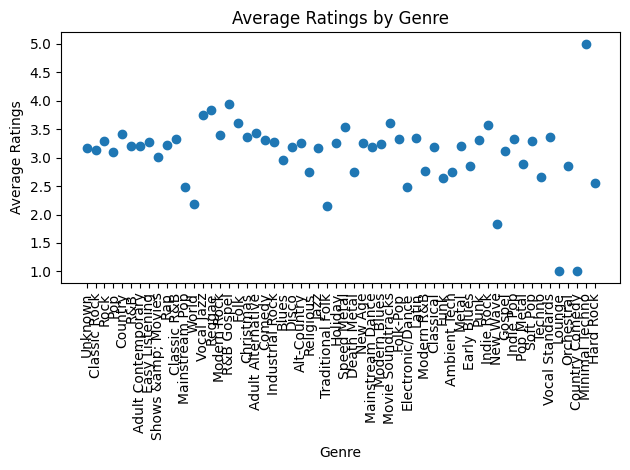

In [30]:
genre_rating_avg_pdf = df.groupBy('genre_name').avg('ratings').toPandas()

plt.scatter(data=genre_rating_avg_pdf, x='genre_name', y='avg(ratings)')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
genre_rating_avg_pdf

,genre_name,avg(ratings)
0,Unknown,3.173833
1,Classic Rock,3.129104
2,Rock,3.298292
3,Pop,3.099704
4,Country,3.419199
5,R&B,3.200488
6,Adult Contemporary,3.209360
7,Easy Listening,3.268251
8,Shows &amp; Movies,3.013333
9,Rap,3.227132
